In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_excel("covid_19_india.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   S. No.                                      25 non-null     int64 
 1   Name of State / UT                          25 non-null     object
 2   Total Confirmed cases (Indian National)     25 non-null     int64 
 3   Total Confirmed cases ( Foreign National )  25 non-null     int64 
 4   Cured                                       25 non-null     int64 
 5   Death                                       25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [3]:
df["Total Cases"] = df["Total Confirmed cases (Indian National)"] + df["Total Confirmed cases ( Foreign National )"]
df = df.drop(["Total Confirmed cases (Indian National)", "Total Confirmed cases ( Foreign National )", "S. No."], axis = 1)
df.rename(columns = {"Name of State / UT" : "state"}, inplace = True)

In [4]:
df.head()

,state,Cured,Death,Total Cases
0,Andhra Pradesh,0,0,9
1,Bihar,0,1,3
2,Chhattisgarh,0,0,1
3,Delhi,6,1,31
4,Gujarat,0,1,33


In [5]:
India = pd.read_excel("per_day_cases.xlsx",parse_dates = True, sheet_name="India")

In [6]:
df["Total Active"] = df["Total Cases"] - (df["Death"] + df["Cured"])
print("Total number of active cases of covid 19 in the month of march 2020 in india : ", df["Total Active"].sum())

Total number of active cases of covid 19 in the month of march 2020 in india :  512


In [7]:
print("10 State which have highest Active Cases in the month of march 2020 in India\n")
df.groupby("state")["Total Active"].sum().sort_values(ascending = False).reset_index().head(10)

10 State which have highest Active Cases in the month of march 2020 in India



,state,Total Active
0,Kerala,105
1,Maharashtra,99
2,Karnataka,37
3,Telengana,34
4,Gujarat,32
5,Rajasthan,29
6,Punjab,28
7,Uttar Pradesh,24
8,Delhi,24
9,Haryana,17


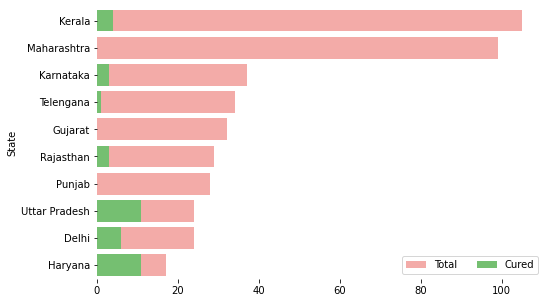

In [8]:
f,ax = plt.subplots(figsize = (8,5))
data = df
data.sort_values("Total Active", ascending = False, inplace = True)
data = data.head(10)
sns.set_color_codes("pastel")
sns.barplot(x = "Total Active",y = "state", data = data, label = "Total", color = "r")

sns.set_color_codes("muted")
sns.barplot(x = "Cured", y = "state", data = data, label = "Cured", color = "g")

ax.legend(ncol = 2, loc = "lower right", frameon = True)
ax.set(ylabel = "State", xlabel = None)
sns.despine(left = True, bottom = True)
plt.show()

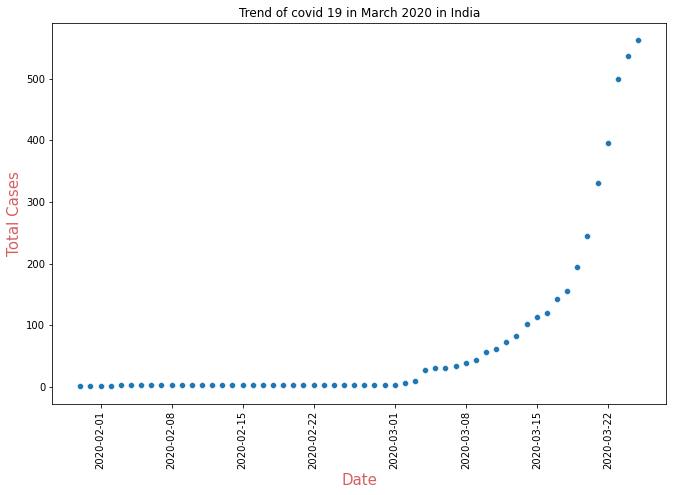

In [9]:
plt.figure(figsize = (11,7))
plt.xticks(rotation = 90)
sns.scatterplot(x = India["Date"], y = India["Total Cases"])
plt.xlabel("Date", fontsize = 15, c = "r")
plt.ylabel("Total Cases", fontsize = 15, c = "r")
plt.title("Trend of covid 19 in March 2020 in India")
plt.style.use("seaborn-dark-palette")
plt.show()